# Visualizing Pickups and Dropoffs for January 2013 at different times of the day

## Load NYC Taxi data 

In [2]:
import pandas as pd
%matplotlib inline

In [4]:
%time df = pd.read_csv('../nyc_taxi_files/trip_data_files/trip_data_1.csv', usecols= \
                       ['pickup_longitude', 'pickup_latitude', 'pickup_datetime', 'dropoff_datetime', 'dropoff_longitude','dropoff_latitude', 'passenger_count'])
df.tail()

Wall time: 46.5 s


,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
14776610,2013-01-06 04:58:23,2013-01-06 05:11:24,1,-73.989029,40.759327,-73.953743,40.770672
14776611,2013-01-08 14:42:04,2013-01-08 14:50:27,1,-73.993042,40.733990,-73.982483,40.724823
14776612,2013-01-10 13:29:23,2013-01-10 13:34:45,1,-73.979553,40.785011,-73.968262,40.788158
14776613,2013-01-06 16:30:15,2013-01-06 16:42:26,1,-73.968002,40.762161,-73.985992,40.770542
14776614,2013-01-05 20:38:46,2013-01-05 20:43:06,1,-73.982224,40.766670,-73.989212,40.773636


In [9]:
import time

df['pickup_hour']=df['pickup_datetime'].apply(lambda x: time.strptime(x, "%Y-%m-%d %H:%M:%S").tm_hour)
df['dropoff_hour']=df['dropoff_datetime'].apply(lambda x: time.strptime(x, "%Y-%m-%d %H:%M:%S").tm_hour)

In [10]:
df.tail()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,dropoff_hour
14776610,2013-01-06 04:58:23,2013-01-06 05:11:24,1,-73.989029,40.759327,-73.953743,40.770672,4,5
14776611,2013-01-08 14:42:04,2013-01-08 14:50:27,1,-73.993042,40.733990,-73.982483,40.724823,14,14
14776612,2013-01-10 13:29:23,2013-01-10 13:34:45,1,-73.979553,40.785011,-73.968262,40.788158,13,13
14776613,2013-01-06 16:30:15,2013-01-06 16:42:26,1,-73.968002,40.762161,-73.985992,40.770542,16,16
14776614,2013-01-05 20:38:46,2013-01-05 20:43:06,1,-73.982224,40.766670,-73.989212,40.773636,20,20


In [11]:
%%time

df.to_csv('../nyc_taxi_files/2013_January_trip_hours.csv',index=False)

Wall time: 2min 9s


In [12]:
%%time
df = pd.read_csv('../nyc_taxi_files/2013_January_trip_hours.csv')

df.head()

Wall time: 1min 31s


In [13]:
df.describe()

C:\Users\Anirban\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_hour,dropoff_hour
count,1.477662e+07,1.477662e+07,1.477662e+07,1.477653e+07,1.477653e+07,1.477662e+07,1.477662e+07
mean,1.697372e+00,-7.263634e+01,4.001440e+01,-7.259443e+01,3.999219e+01,1.358165e+01,1.358404e+01
std,1.365396e+00,1.013819e+01,7.789904e+00,1.028860e+01,7.537067e+00,6.401632e+00,6.461708e+00
min,0.000000e+00,-2.771285e+03,-3.547921e+03,-2.350956e+03,-3.547921e+03,0.000000e+00,0.000000e+00
25%,1.000000e+00,-7.399188e+01,4.073551e+01,NaN,NaN,9.000000e+00,9.000000e+00
50%,1.000000e+00,-7.398166e+01,4.075315e+01,NaN,NaN,1.400000e+01,1.400000e+01
75%,2.000000e+00,-7.396684e+01,4.076729e+01,NaN,NaN,1.900000e+01,1.900000e+01
max,2.550000e+02,1.124042e+02,3.310365e+03,2.228738e+03,3.477106e+03,2.300000e+01,2.300000e+01


-73.98217


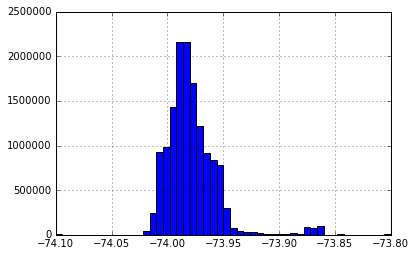

In [5]:
print df[(df['pickup_longitude']>-74.1)&(df['pickup_longitude']<-73.8)]['pickup_longitude'].median()
df[(df['pickup_longitude']>-74.1)&(df['pickup_longitude']<-73.8)]['pickup_longitude'].hist(bins=50)

40.753811


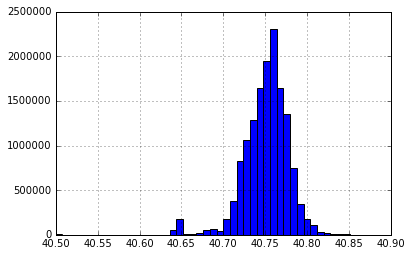

In [6]:
print df[(df['pickup_latitude']>40.6)&(df['pickup_latitude']<40.9)]['pickup_latitude'].median()
df[(df['pickup_latitude']>40.5)&(df['pickup_latitude']<40.9)]['pickup_latitude'].hist(bins=50)

As you can see, this file contains about 12 million pickup and dropoff locations (in Web Mercator coordinates), with passenger counts.

## Define a simple plot

In [7]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

# x_range=(-74.018629,-73.905500)
# y_range=(40.704889,40.831201)

x_range=(-74.05,-73.8)
y_range=(40.7,40.8)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=900, plot_height=600, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,**plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
    
options = dict(line_color=None, fill_color='blue', size=5)

from IPython.core.display import HTML, display
display(HTML("<style>.container { width:90% !important; }</style>"))

Loading BokehJS ...

In [17]:
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:-2]

In [18]:
import numpy as np

def histogram(x,colors=None):
    hist,edges = np.histogram(x, bins=100)
    p = figure(y_axis_label="Pixels",
               tools='', height=130, outline_line_color=None,
               min_border=0, min_border_left=0, min_border_right=0,
               min_border_top=0, min_border_bottom=0)
    p.quad(top=hist[1:], bottom=0, left=edges[1:-1], right=edges[2:])
    print("min: {}, max: {}".format(np.min(x),np.max(x)))
    show(p)

In [14]:
import datashader as ds
from datashader.callbacks import InteractiveImage
from datashader.colors import Hot, inferno

In [19]:
def draw_pickup_dropoff_maps(hour_start, hour_end):    
   
    cvs = ds.Canvas(plot_width=900, plot_height=600, x_range=x_range, y_range=y_range)

    # Pickup map
    pickup_df = df[(df['pickup_hour'] >= hour_start) & (df['pickup_hour']<hour_end)]
    agg1 = cvs.points(pickup_df, 'pickup_longitude', 'pickup_latitude')

    # Dropoff map
    dropoff_df = df[(df['dropoff_hour'] >= hour_start) & (df['dropoff_hour']<hour_end)]
    agg2 = cvs.points(dropoff_df, 'dropoff_longitude', 'dropoff_latitude')

    img1=tf.interpolate(agg1.where(agg1>agg2), cmap=["lightblue", 'blue'], how='eq_hist')
    img2=tf.interpolate(agg2.where(agg2>agg1), cmap=["lightpink", 'red'], how='eq_hist')

    img = tf.stack(img1,img2)
#     return tf.dynspread(img, threshold=0.1, max_px=4)
    return img

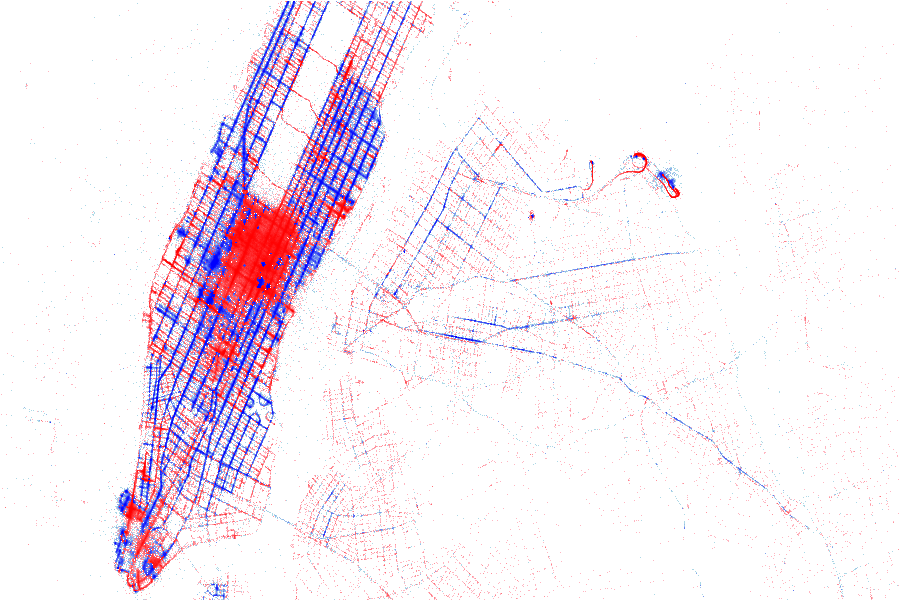

In [20]:
img=draw_pickup_dropoff_maps(6, 8)
img

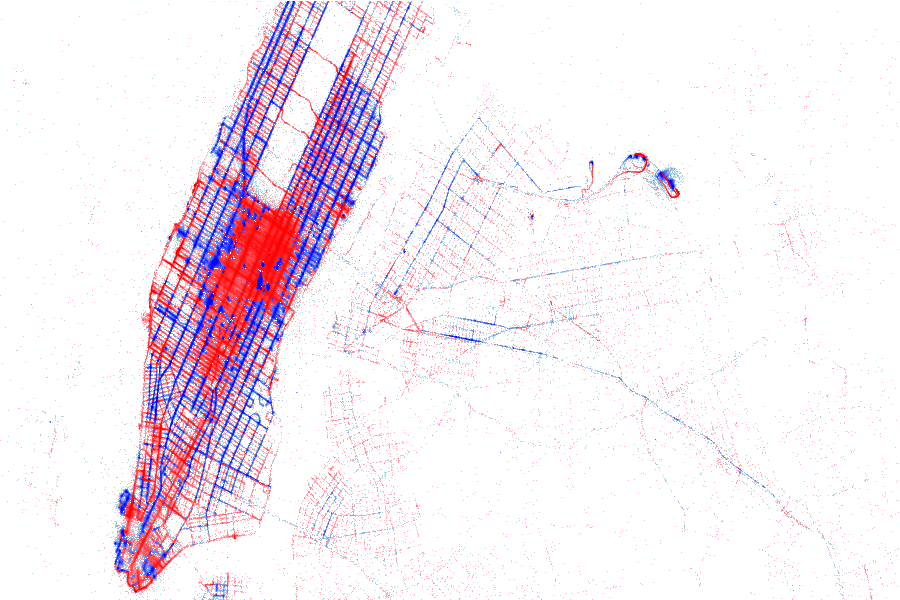

In [21]:
img=draw_pickup_dropoff_maps(8, 10)
img

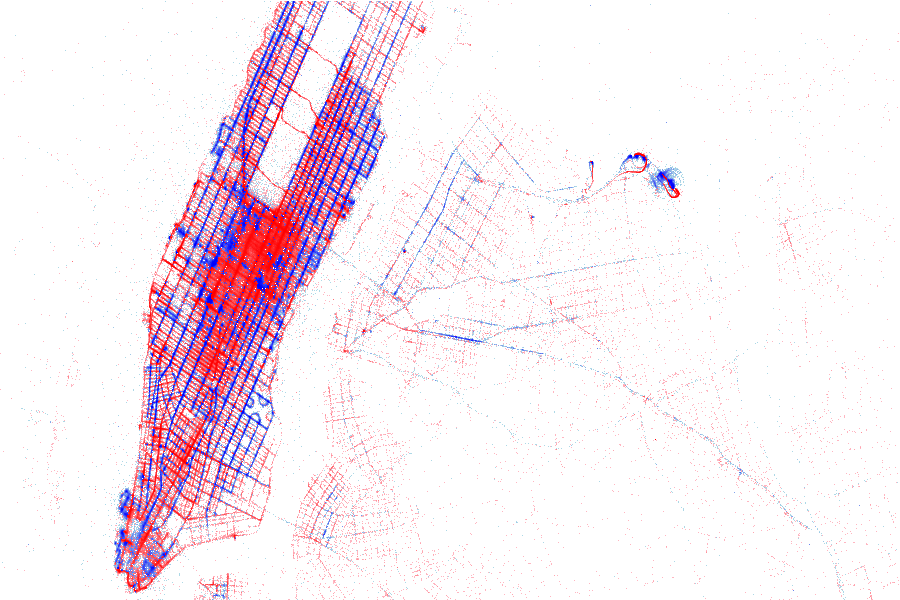

In [22]:
img=draw_pickup_dropoff_maps(10, 12)
img

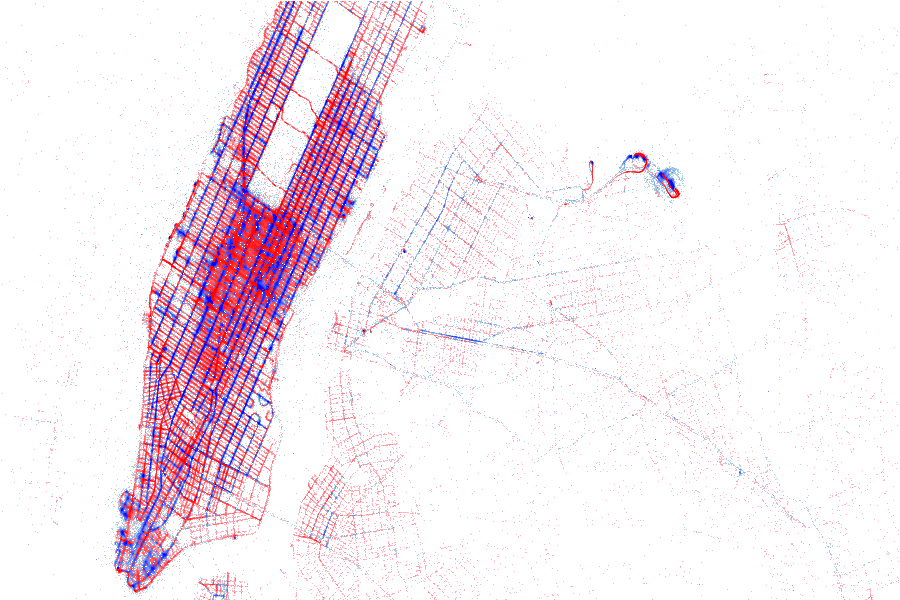

In [23]:
img=draw_pickup_dropoff_maps(12, 14)
img

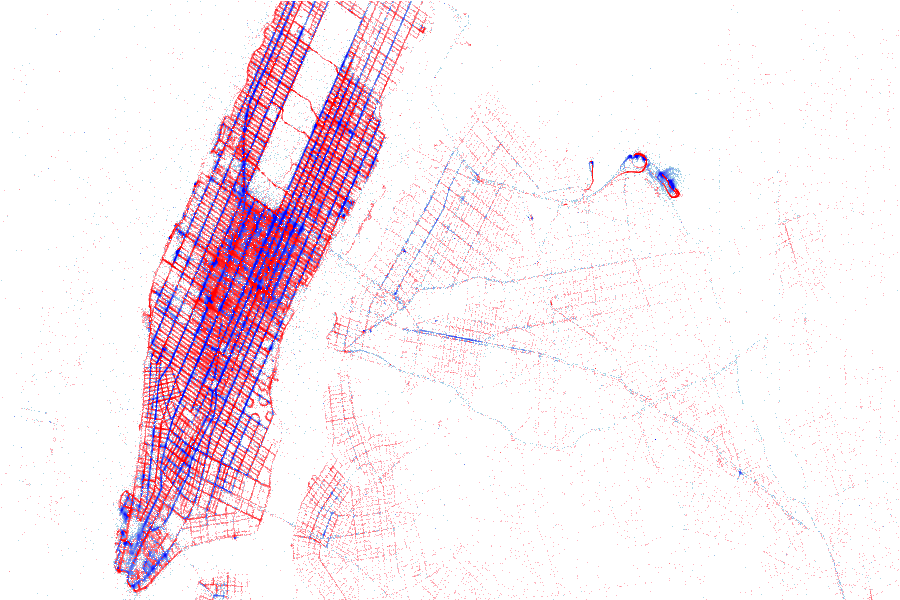

In [24]:
img=draw_pickup_dropoff_maps(14, 16)
img

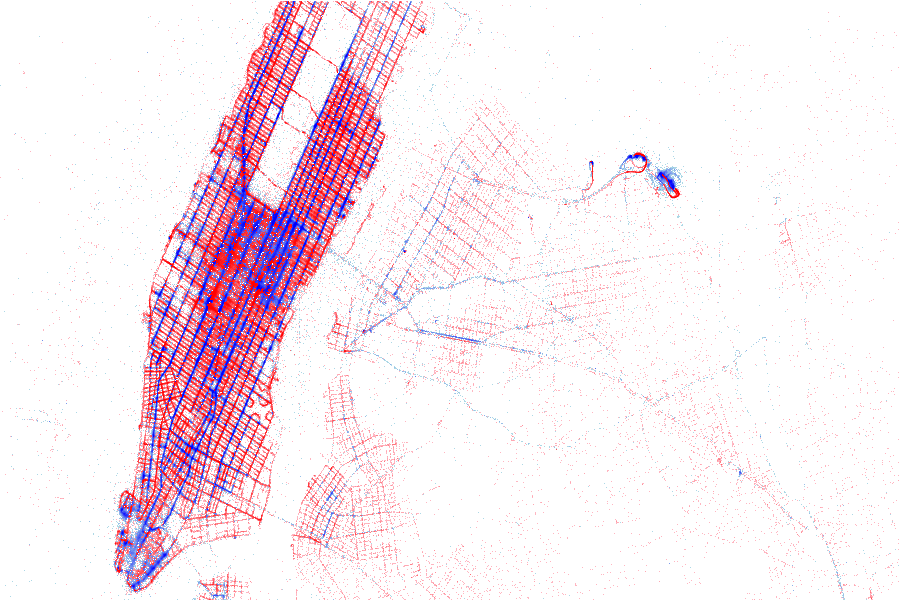

In [25]:
img=draw_pickup_dropoff_maps(16, 18)
img

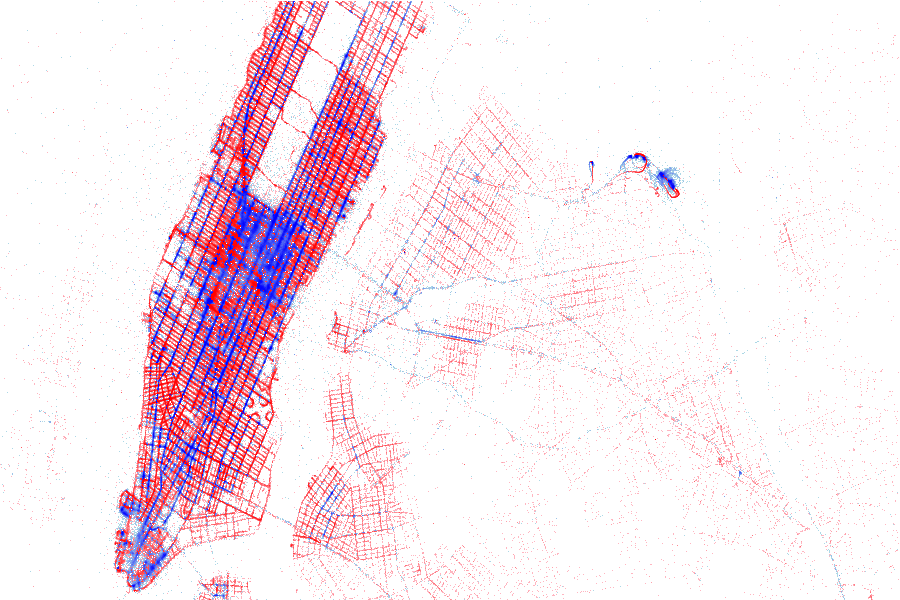

In [26]:
img=draw_pickup_dropoff_maps(18, 20)
img

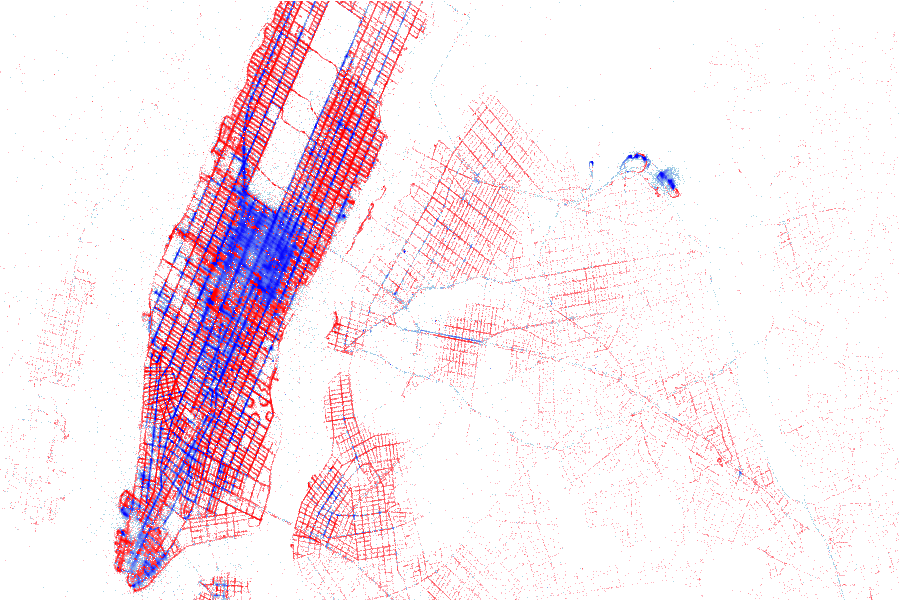

In [27]:
img=draw_pickup_dropoff_maps(20, 22)
img

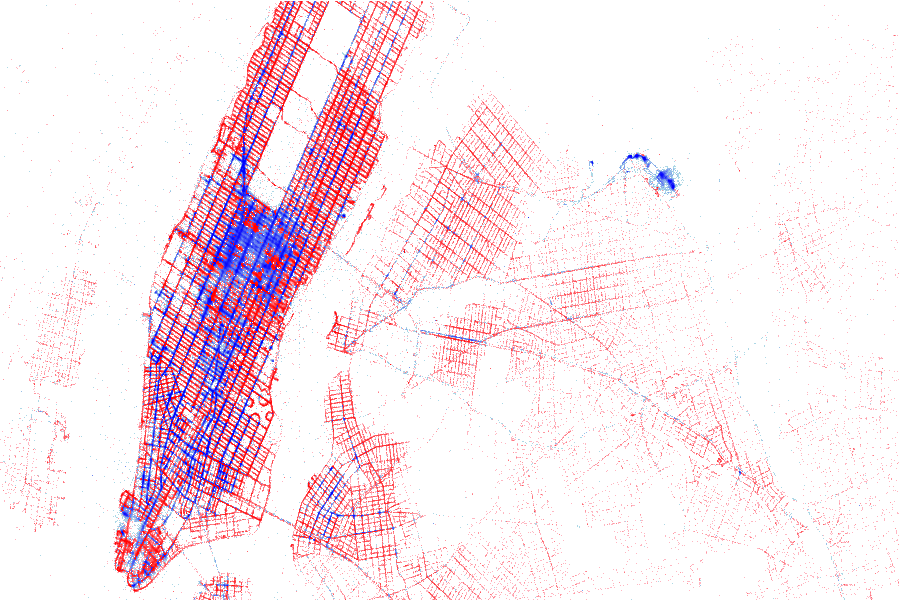

In [28]:
img=draw_pickup_dropoff_maps(22,24)
img

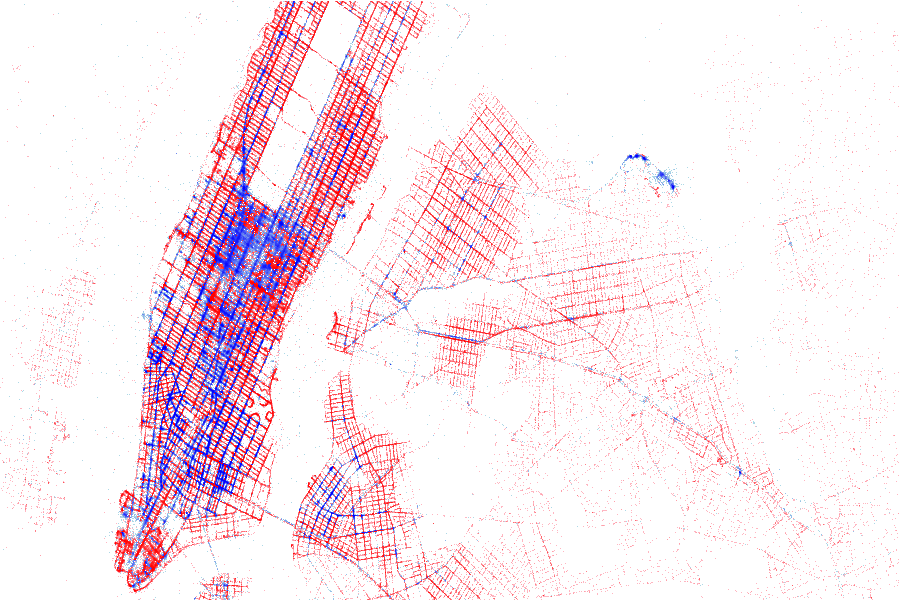

In [29]:
img=draw_pickup_dropoff_maps(0, 2)
img

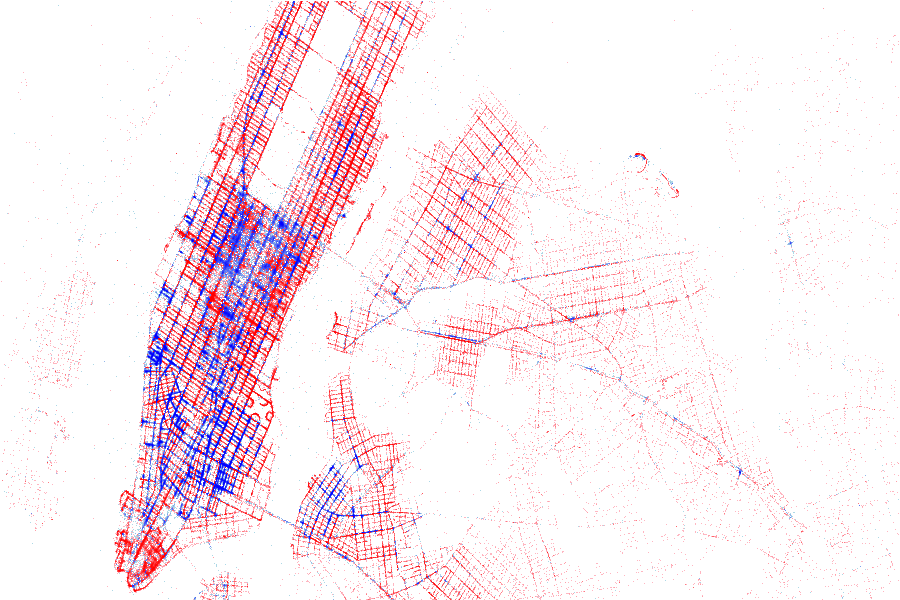

In [30]:
img=draw_pickup_dropoff_maps(2, 4)
img

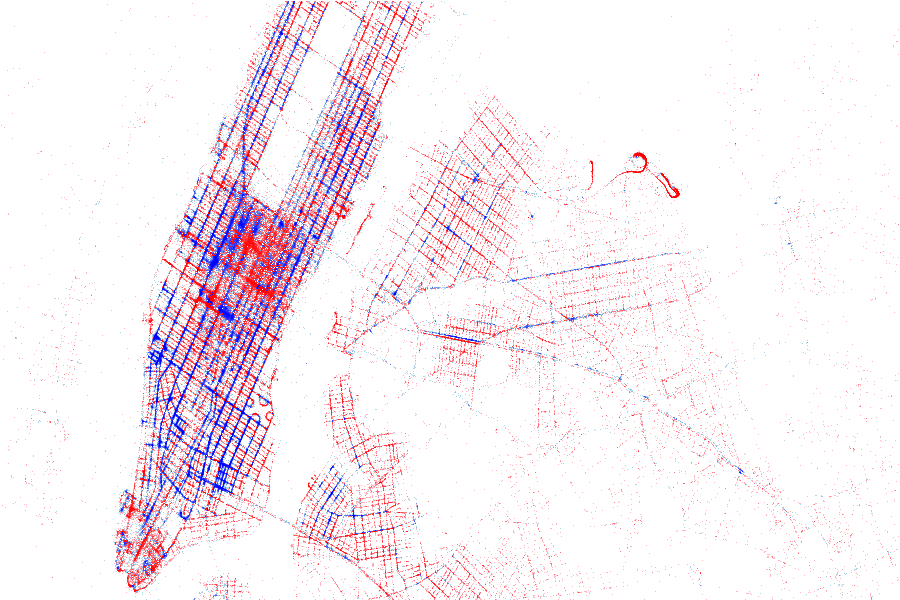

In [32]:
img=draw_pickup_dropoff_maps(4, 6)
img

In [1]:
# def create_image(x_range, y_range, w, h):
#     cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
#     agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.count('passenger_count'))
#     img = tf.interpolate(agg, cmap=Hot, how='eq_hist')
#     return tf.dynspread(img, threshold=0.5, max_px=4)

# p = base_plot(background_fill_color="black",responsive=True, plot_width=int(900*1.5), plot_height=int(600*1.5))
# InteractiveImage(p, create_image)

In [2]:
# def merged_images(x_range, y_range, w, h, how='log'):
#     cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
#     picks = cvs.points(df, 'pickup_x',  'pickup_y',  ds.count('passenger_count'))
#     drops = cvs.points(df, 'dropoff_x', 'dropoff_y', ds.count('passenger_count'))
#     more_drops = tf.interpolate(drops.where(drops > picks), cmap=["lightblue", 'blue'], how=how)
#     more_picks = tf.interpolate(picks.where(picks > drops), cmap=["lightpink", 'red'],  how=how)
#     img = tf.stack(more_picks,more_drops)
#     return tf.dynspread(img, threshold=0.1, max_px=4)

# p = base_plot()
# InteractiveImage(p, merged_images)

In [1]:
# %%time

# samples = df.sample(n=10000)

# p = base_plot()
# # p.add_tile(STAMEN_TERRAIN)

# p.circle(x=samples['dropoff_longitude'], y=samples['dropoff_latitude'], **options)
# show(p)